In [4]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

### Read Data Using Pandas

In [5]:
import pandas as pd

In [6]:
!ls -lh ./yelp.json.gz

-rw-r--r-- 1 Tarek 197121 4.2M Nov 13 14:09 ./yelp.json.gz


In [18]:
pd.__version__

'0.24.2'

In [27]:
yelp_df = pd.read_json('yelp.json.gz', orient = 'records', lines = True)
yelp_df.dtypes

attributes        object
business_id       object
categories        object
city              object
full_address      object
hours             object
latitude         float64
longitude        float64
name              object
neighborhoods     object
open                bool
review_count       int64
stars            float64
state             object
type              object
dtype: object

In [34]:
yelp_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
1,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business
3,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business
4,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business


In [7]:
import gzip
import simplejson as json

with gzip.open('./yelp.json.gz', 'r') as f:
    yelp_data = [json.loads(line) for line in f]
    
yelp_df = pd.DataFrame(yelp_data)

In [14]:
r, c = yelp_df.shape
r, c

(37938, 15)

In [1]:
# yelp_df.columns.tolist()

In [20]:
# Another way to extract column names off the pandas dataframe
sorted(yelp_df)

['attributes',
 'business_id',
 'categories',
 'city',
 'full_address',
 'hours',
 'latitude',
 'longitude',
 'name',
 'neighborhoods',
 'open',
 'review_count',
 'stars',
 'state',
 'type']

In [67]:
yelp_df.dtypes

attributes        object
business_id       object
categories        object
city              object
full_address      object
hours             object
latitude         float64
longitude        float64
name              object
neighborhoods     object
open                bool
review_count       int64
stars            float64
state             object
type              object
dtype: object

In [68]:
type(yelp_df)

pandas.core.frame.DataFrame

In [59]:
yelp_df.city.count()

37938

In [65]:
yelp_df.groupby('city').count()[['business_id']].sort_values(by = 'business_id', ascending = False).head(10)

,business_id
city,
Las Vegas,10851
Phoenix,6715
Scottsdale,3226
Edinburgh,2595
Mesa,1847
Tempe,1822
Henderson,1740
Chandler,1468
Madison,1465


In [69]:
type(yelp_df['city'])

pandas.core.series.Series

An individual column is a Pandas `Series`. A `Series` has a `name` and a `dtype` (similar to a NumPy array). A `DataFrame` is essentially a `dict` of `Series` objects. The `Series` has an `index` attribute, which label the rows. The index is essentially a set of keys for referencing the rows. We can have an index composed of numbers, strings, timestamps, or any hashable Python object. The index will also have homogeneous type.

In [78]:
type(yelp_df.index)

pandas.core.indexes.range.RangeIndex

The `DataFrame` has an `index` given by the union of indices of its constituent `Series` (we'll explore this later in more detail). Since a `DataFrame` is a `dict` of `Series`, we can select a column and then a row using square bracket notation, but not the reverse (however, the `loc` method works around this).

In [83]:
yelp_df['city'][:3]

0      Phoenix
1    De Forest
2    De Forest
Name: city, dtype: object

In [84]:
yelp_df.loc[:3, 'city']

0      Phoenix
1    De Forest
2    De Forest
3    De Forest
Name: city, dtype: object

Understanding the underlying structure of the `DataFrame` object as a `dict` of `Series` will help you avoid errors and help you think about how the `DataFrame` should behave when we begin doing more complicated analysis.

We can _aggregate_ data in a `DataFrame` using methods like `mean`, `sum`, `count`, and `std`. To view a collection of summary statistics for each column we can use the `describe` method.

In [85]:
# Summary Statistics for quantitative fields
yelp_df.describe()

,latitude,longitude,review_count,stars
count,37938.000000,37938.000000,37938.000000,37938.000000
mean,36.530288,-104.097172,29.300648,3.672914
std,5.822588,28.365375,92.893064,0.888730
min,32.876638,-115.369725,3.000000,1.000000
25%,33.476739,-115.136389,4.000000,3.000000
50%,33.680247,-112.068820,8.000000,3.500000
75%,36.141875,-111.883274,21.000000,4.500000
max,56.033777,-3.050088,4084.000000,5.000000


In [102]:
dict(yelp_df.groupby('city')['business_id'].count().sort_values(ascending = False).head(10))

{'Las Vegas': 10851,
 'Phoenix': 6715,
 'Scottsdale': 3226,
 'Edinburgh': 2595,
 'Mesa': 1847,
 'Tempe': 1822,
 'Henderson': 1740,
 'Chandler': 1468,
 'Madison': 1465,
 'Glendale': 1094}

### Filtering DataFrames

In [72]:
# Businesses in Las Vegas, NV only whose review count is more than 10
LV_yelps = yelp_df[(yelp_df['city'] == 'Las Vegas') & (yelp_df['state'] == 'NV') & (yelp_df['review_count'] > 10)].reset_index()
LV_yelps[['business_id','name', 'categories', 'review_count', 'stars', 'open']].loc[:10]

,business_id,name,categories,review_count,stars,open
0,I83NNRHZRQZiCPcd9QzC5w,Boulder Station Hotel & Casino,"[Arts & Entertainment, Casinos]",100,3.0,True
1,ZeMHiF-u7WZY1gf3-L6Alg,Petco,"[Pet Services, Pet Groomers, Pet Training, Pet...",11,2.0,True
2,l6QcUE8XXLrVH6Ydm4GSNw,Fatburger,"[Burgers, American (Traditional), Fast Food, R...",13,3.0,True
3,aBFiwLYaReshow7wi9Jmqw,Discount Tire Store - North Las Vegas,"[Tires, Automotive, Wheel & Rim Repair]",20,4.5,True
4,FGorBTbpa1VmLwf4nXBqPw,Ear Nose & Throat Consultants of Nevada,"[Doctors, Ear Nose & Throat, Health & Medical]",13,2.5,True
5,5WCXIZI2_M444IHPwxnt7Q,Desert Valley Pediatrics,"[Doctors, Health & Medical, Pediatricians]",21,2.5,True
6,0k-VfADQlgESYsjRJ0P0KA,Shepherd Eye Center,"[Doctors, Ophthalmologists, Health & Medical]",11,3.5,True
7,VZyE9u5-gAG62zfe53hXWA,Artisan Hotel Boutique,"[Bars, Nightlife, Lounges, Hotels & Travel, Ho...",310,3.5,True
8,AFDFOs2GaIyUArGyEUDQzQ,Cafe Noodle & Chinese Barbeque,"[Chinese, Restaurants]",141,3.5,True
9,FV16IeXJp2W6pnghTz2FAw,Pho Kim Long,"[Vietnamese, Chinese, Restaurants]",1314,3.5,True


In [73]:
# Which business has the most review counts in Las Vegas
LV_yelps[['business_id','name', 'categories', 'review_count', 'stars', 'open']].sort_values(by = 'review_count', ascending = False).iloc[0]['name']

'Mon Ami Gabi'

In [74]:
# Check that Las Vegas is only in NV 
LV_yelps['state'].unique()

array(['NV'], dtype=object)

Let's now consider the `'open'` column, which is a `True`/`False` flag for whether a business is open. This is also a Boolean Pandas `Series`, so we can just use it directly.

In [76]:
# the open businesses
yelp_df[yelp_df['open']].head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
1,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business
3,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business
4,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business


In [78]:
# Let's look only at the open businesses in Las Vegas, NV
LV_yelps_open = LV_yelps[LV_yelps['open']]
len(LV_yelps_open), len(LV_yelps)

(4652, 5312)

In [79]:
# The closed businesses in Vegas are
LV_yelps_closed = LV_yelps[~LV_yelps['open']]
len(LV_yelps_closed)

660

Notice in an earlier expression we wrote `(yelp_df['state'] == 'AZ') & (yelp_df['review_count'] > 10)`. Normally in Python we use the word `and` when we are working with logic. In Pandas we have to use _bit-wise_ logical operators; all that's important to know is the following equivalencies:

`~` = `not`  
`&` = `and`  
`|` = `or`  

We can also use Panda's built-in [string operations](https://pandas.pydata.org/pandas-docs/stable/text.html) for doing pattern matching. For example, there are a lot of businesses in Las Vegas in our data set. However, there are also businesses in 'Las Vegas East' and 'South Las Vegas'. To get all of the Las Vegas businesses I might do the following.

In [82]:
vegas_yelp_df = yelp_df[yelp_df['city'].str.contains('Vegas')]
vegas_yelp_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
4348,"{'Parking': {'garage': False, 'street': False,...",uzztTCsg3XAKlYqmLO40aw,"[Arts & Entertainment, Shopping, Books, Mags, ...",Las Vegas,"5835 S Eastern Ave\nSoutheast\nLas Vegas, NV 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",36.083936,-115.119422,Psychic Eye Book Shops,[Southeast],True,7,4.5,NV,business
4360,"{'Parking': {'garage': True, 'street': False, ...",IspFZDcpu9W5NvvJ7QgJZg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Las Vegas,The Forum Shops At Caesars\n3500 Las Vegas Blv...,"{'Monday': {'close': '21:00', 'open': '10:00'}...",36.124423,-115.146372,Gap,[Eastside],True,6,4.5,NV,business
4364,"{'By Appointment Only': False, 'Parking': {'ga...",Dvulg9cc3XHkt5DkBUekhw,"[Hair Salons, Beauty & Spas]",Las Vegas,467 E Silverado Ranch Blvd\nSte 175\nSoutheast...,{},36.012150,-115.153303,Great Clips,[Southeast],True,10,2.5,NV,business
4441,"{'Alcohol': 'full_bar', 'Music': {'video': Fal...",_SM8UKIwBNbmj1r629ipoQ,"[Wine Bars, Bars, Restaurants, Nightlife, Ital...",Las Vegas,"1916 Village Center Cir\nSummerlin\nLas Vegas,...","{'Monday': {'close': '23:00', 'open': '11:00'}...",36.192414,-115.304396,Chianti Cafe,[Summerlin],False,9,3.5,NV,business
4489,{},Zaw0IAXwopKX4MV23MHQRw,"[Car Wash, Automotive]",Las Vegas,"2718 E Tropicana Avenue\nEastside\nLas Vegas, ...",{},36.100507,-115.113492,Terrible Herbst,"[Eastside, Southeast]",True,3,1.5,NV,business


In [83]:
vegas_yelp_df['city'].unique()

array(['Las Vegas', 'North Las Vegas', 'N Las Vegas', 'N. Las Vegas',
       'C Las Vegas', 'Las Vegas ', 'Las Vegas, NV 89147',
       'Las Vegas East', 'North Las Vegas ', 'N E Las Vegas',
       'N W Las Vegas', 'Lake Las Vegas', 'South Las Vegas'], dtype=object)

In [84]:
vegas_yelp_df['state'].unique()

array(['NV', 'NC'], dtype=object)

In [85]:
len(vegas_yelp_df)

11337

In [88]:
len(vegas_yelp_df) - dict(yelp_df.groupby('city')['business_id'].count())['Las Vegas']

486

## Applying functions and data aggregation

To analyze the data in the dataframe, we'll need to be able to apply functions to it. Pandas has many mathematical functions built in already, and DataFrames and Series can be passed to NumPy functions (since they behave like NumPy arrays).

In [101]:
import numpy as np
log_review_count = np.log(yelp_df['review_count'])
log_review_count.head()

0    1.945910
1    3.258097
2    2.772589
3    1.945910
4    1.098612
Name: review_count, dtype: float64

In [93]:
mean_review_count = yelp_df['review_count'].mean()
round(mean_review_count, 2)

29.3

In [99]:
# Average counts of reviews in Las Vegas, NV.
round(LV_yelps['review_count'].mean(),2), max(LV_yelps['review_count'])

(92.88, 4084)

In the first example we took the _logarithm_ of the review count for each business. In the second case, we calculated the mean review count of all businesses. In the first case, we ended up with a number for each business. We _transformed_ the review counts using the logarithm. In the second case, we _summarized_ the review counts of all the businesses in one number. This summary is a form of _data aggregation_, in which we take many data points and combine them into some smaller representation. The functions we apply to our data sets will either be in the category of **transformations** or **aggregations**.

Sometimes we will need to transform our data in order for it to be usable. For instance, in the `'attributes'` column of our DataFrame, we have a `dict` for each business listing all of its properties. If I wanted to find a restaurant that offers delivery service, it would be difficult for me to filter the DataFrame, even though that information is in the `'attributes'` column. First, I need to transform the `dict` into something more useful.

In [102]:
def get_delivery_attr(attr_dict):
    return attr_dict.get('Delivery')

DataFrames and Series have an apply method that allows us to apply our function to the entire data set at once.

In [103]:
delivery_attr = yelp_df['attributes'].apply(get_delivery_attr)
delivery_attr.head()

0     None
1    False
2    False
3    False
4     None
Name: attributes, dtype: object

In [107]:
# Create a new column 'delivery'
yelp_df['delivery'] = delivery_attr

# to find businesses that deliver
yelp_df[yelp_df['delivery'].fillna(False)][['name', 'delivery']].tail(10)

,name,delivery
37816,Nem Nuong Bistro,True
37846,Pin Kaow Thai Restaurant,True
37874,Skinny Chick Fat Chicken,True
37880,Arrivederci Cucina Italiana,True
37881,Grinders Pizza Lounge,True
37889,Brown Rice Thai Kitchen,True
37914,Grand Avenue Pizza Company,True
37929,702 Wing Spot,True
37932,Maza Mediterranean Grill & Lounge,True
37936,LaBella Pizzeria and Restaurant,True


It's less common (though possible) to use `apply` on an entire DataFrame rather than just one column. Since a DataFrame might contain many types of data, we won't usually want to apply the same transformation or aggregation across all of the columns.

## Data aggregation with `groupby`

Data aggregation is an [_overloaded_](https://en.wikipedia.org/wiki/Function_overloading) term. It refers to both data summarization (as above) but also to the combining of different data sets.

With our Yelp data, we might be interested in comparing the star ratings of businesses in different cities. We could calculate the mean star rating for each city, and this would allow us to easily compare them. First we would have to split up our data by city, calculate the mean for each city, and then combine it back at the end. This procedure is known as [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html) and is a classic example of data aggregation (in the sense of both summarizing data and also combining different data sets).

We achieve the splitting and recombining using the `groupby` method.

In [108]:
stars_by_city = yelp_df.groupby('city')['stars'].mean()
stars_by_city.head()

city
Ahwatukee          3.687500
Anthem             3.781818
Apache Junction    3.637500
Arcadia            5.000000
Atlanta            3.500000
Name: stars, dtype: float64

We can also apply multiple functions at once. It might be helpful to know the standard deviation of star ratings, the total number of reviews, and the count of businesses as well.

In [109]:
agg_by_city = yelp_df.groupby('city').agg({'stars': ['mean', 'std'], 'review_count': 'sum', 'business_id': 'count'})
agg_by_city.head()

stars           review_count business_id
                     mean       std          sum       count
city                                                        
Ahwatukee        3.687500  1.066955          258           8
Anthem           3.781818  0.756231          727          55
Apache Junction  3.637500  1.028010          853          80
Arcadia          5.000000       NaN            4           1
Atlanta          3.500000       NaN           16           1

In [110]:
# unstacking the columns
new_columns = map(lambda x: '_'.join(x),
                  zip(agg_by_city.columns.get_level_values(0),
                      agg_by_city.columns.get_level_values(1)))
agg_by_city.columns = new_columns
agg_by_city.head()

,stars_mean,stars_std,review_count_sum,business_id_count
city,,,,
Ahwatukee,3.687500,1.066955,258,8
Anthem,3.781818,0.756231,727,55
Apache Junction,3.637500,1.028010,853,80
Arcadia,5.000000,NaN,4,1
Atlanta,3.500000,NaN,16,1


In [111]:
by_city = yelp_df.groupby('city')
by_city

In [112]:
dir(by_city)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_decide_output_index',
 '_def_str',
 '_define_paths',
 

In [113]:
print(type(by_city.groups))

<class 'dict'>


In [114]:
list(by_city.groups.items())[:5]

[('Ahwatukee',
  Int64Index([1718, 1740, 13572, 17787, 20361, 22856, 28608, 30499], dtype='int64')),
 ('Anthem',
  Int64Index([ 1946,  1948,  1949,  1950,  1951,  1952,  1953,  1954,  1955,
               1956,  1957,  1958,  1961,  1962, 11455, 12008, 12572, 12870,
              13007, 13069, 13286, 13500, 13636, 13703, 13744, 13827, 13935,
              15483, 15581, 15756, 19358, 21295, 21303, 21327, 22354, 22428,
              22654, 22782, 23215, 24937, 25026, 26116, 26300, 26331, 26841,
              26937, 30039, 30170, 31565, 32525, 33027, 33492, 33983, 34663,
              35433],
             dtype='int64')),
 ('Apache Junction',
  Int64Index([ 2392,  2393,  2394,  2395,  2396,  2397,  2398,  2399,  2400,
               2401,  2402,  2403,  2404,  2406,  2407,  2408,  2409,  2410,
               2412,  2413,  2414,  2415,  2417,  2418,  2419,  7305,  7524,
               7525,  7528,  7529,  7530,  7531,  7532,  7533,  7534, 10813,
              11315, 11660, 12662, 12858, 12

In [115]:
by_city.get_group('Anthem').head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,delivery
1946,"{'Parking': {'garage': False, 'street': False,...",Y0Ife2OJPs5QSL-7dyMF5Q,"[Fashion, Shopping, Shoe Stores]",Anthem,"4250 W Anthem Way\nSte 375\nAnthem, AZ 85086",{},33.874003,-112.150162,Nike Factory Store,[],True,8,4.0,AZ,business,None
1948,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",v1ocqAm5soWTNPttLQhSZw,"[Chinese, Restaurants]",Anthem,"3434 W Anthem Way\nSte 118\nAnthem, AZ 85086",{},33.864429,-112.135305,Shanghai Club,[],True,50,3.5,AZ,business,False
1949,"{'Parking': {'garage': False, 'street': False,...",HMDymN9TbFUln9AkqHMpVw,"[Department Stores, Fashion, Shopping]",Anthem,"4250 W Anthem Way\nAnthem, AZ 85086",{},33.875410,-112.151046,Polo Ralph Lauren Factory Store,[],True,3,3.0,AZ,business,None
1950,"{'Parking': {'garage': False, 'street': False,...",XJv7dUb5fMRaZAWVZjhtvw,"[Shopping, Outlet Stores]",Anthem,"4250 W Anthem Way\nAnthem, AZ 85086",{},33.873311,-112.149875,Outlets At Anthem,[],True,64,3.5,AZ,business,None
1951,"{'Ambience': {'romantic': False, 'intimate': F...",xPDbCj9tfp5nnGzYzoCHwA,"[Sandwiches, Restaurants]",Anthem,"3655 W Anthem Way\nSte C105\nAnthem, AZ 85086",{},33.864913,-112.138854,Subway,[],True,6,3.0,AZ,business,None


When we use `groupby` on a column, Pandas builds a `dict`, using the unique elements of the column as the keys and the index of the rows in each group as the values. This `dict` is stored in the `groups` attribute. Pandas can then use this `dict` to direct the application of aggregating functions over the different groups.

## Sorting

Even though the DataFrame in many ways behaves similarly to a `dict`, it also is ordered. Therefore we can sort the data in it. Pandas provides two sorting methods, `sort_values` and `sort_index`.

In [116]:
yelp_df.set_index('business_id').sort_index().head()

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,delivery
business_id,,,,,,,,,,,,,,,
--1emggGHgoG6ipd_RMb-g,"{'Parking': {'garage': False, 'street': False,...","[Food, Convenience Stores]",Las Vegas,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},36.130531,-115.207238,Sinclair,[Westside],True,4,4.0,NV,business,None
--4Pe8BZ6gj57VFL5mUE8g,"{'Parking': {'garage': False, 'street': False,...","[Shopping, Office Equipment]",Phoenix,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},33.678615,-111.974607,Office Max,[],True,5,3.0,AZ,business,None
--5jkZ3-nUPZxUvtcbr8Uw,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...","[Greek, Restaurants]",Scottsdale,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Monday': {'close': '21:00', 'open': '11:00'}...",33.463373,-111.926908,Mika's Greek,[],True,42,4.5,AZ,business,False
--BlvDO_RG2yElKu9XA1_g,"{'Take-out': True, 'Wi-Fi': 'free', 'Good For'...","[Sushi Bars, Hawaiian, Chinese, Restaurants]",Scottsdale,"14870 N Northsight Blvd\nSte 103\nScottsdale, ...","{'Monday': {'close': '21:00', 'open': '10:30'}...",33.620568,-111.897836,Asian Island,[],True,65,4.0,AZ,business,True
--Dl2rW_xO8GuYBomlg9zw,{'By Appointment Only': True},"[Medical Centers, Health & Medical]",Las Vegas,"4505 S Maryland Pkwy\nUniversity\nLas Vegas, N...",{},36.110940,-115.141514,UNLV Student Health Center,[University],True,6,4.0,NV,business,None


## Joining Data Sets

In [117]:
census = pd.read_csv('PEP_2016_PEPANNRES.csv', skiprows=[1])
census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744


In [118]:
len(census)

21143

In [191]:
# Address field
address = census['GEO.display-label'].apply(lambda x: x.split(","))
city = address.apply(lambda x: "".join(x[0].split(maxsplit = 0)[0]))
county = address.apply(lambda x: x[1].split(maxsplit = 0)[0])
state = address.apply(lambda x: x[2].split(maxsplit = 0)[0])
result = pd.DataFrame(zip(city, county, state), columns=["city", "county", "state"])
# Add the State column to the census dataframe
# census['state'] = result['state']
result.head()
# result['state'].unique()

,city,county,state
0,Bethel town,Fairfield County,Connecticut
1,Bridgeport town,Fairfield County,Connecticut
2,Brookfield town,Fairfield County,Connecticut
3,Danbury town,Fairfield County,Connecticut
4,Darien town,Fairfield County,Connecticut


In [192]:
# Add the state column from the result to the census dataframe
census['state'] = result['state']
census.tail()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,state,city
21138,0610000US5514173475,5514173475,"Sherry town, Wood County, Wisconsin",803.0,803,803,815,817,811,800,798,789,Wisconsin,S h e r r y t o
21139,0610000US5514173900,5514173900,"Sigel town, Wood County, Wisconsin",1051.0,1051,1051,1048,1043,1038,1031,1028,1021,Wisconsin,S i g e l t o
21140,0610000US5514182650,5514182650,"Vesper village, Wood County, Wisconsin",584.0,584,584,580,575,571,565,558,554,Wisconsin,V e s p e r v i l l a
21141,0610000US5514188200,5514188200,"Wisconsin Rapids city, Wood County, Wisconsin",18367.0,18385,18376,18315,18201,18037,17958,17862,17887,Wisconsin,W i s c o n s i n R a p i d s c i
21142,0610000US5514188575,5514188575,"Wood town, Wood County, Wisconsin",796.0,796,796,791,788,779,769,765,759,Wisconsin,W o o d t o


In [193]:
# convert state names to abbreviations
census['state'].unique()

array(['Connecticut', 'Illinois', 'Indiana', 'Kansas', 'Maine',
       'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New York', 'North Dakota', 'Ohio',
       'Pennsylvania', 'Rhode Island', 'South Dakota', 'Vermont',
       'Wisconsin'], dtype=object)

In [194]:
state_abbr = dict(zip(census['state'].unique(), ['CT', 'IL', 'IN', 'KS', 'ME', 'MA', 'MI', 'MN', 'MO', 'NE', 'NH', 'NJ', 'NY', 'ND', 'OH', 'PA', 'RI', 'SD', 'VT', 'WI']))
census['state'] = census['state'].replace(state_abbr)
census['state'].head()

0    CT
1    CT
2    CT
3    CT
4    CT
Name: state, dtype: object

In [195]:
# Add the city from the result dataframe to the census dataframe
census['city'] = result['city']
census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,state,city
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627,CT,Bethel town
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936,CT,Bridgeport town
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098,CT,Brookfield town
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992,CT,Danbury town
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744,CT,Darien town


In [196]:
# remove last word (e.g. 'city', 'town', township', 'borough', 'village') from city names
census['city'] = census['city'].apply(lambda x: ' '.join(x.split(' ')[:-1]))
census['city'].head()

0        Bethel
1    Bridgeport
2    Brookfield
3       Danbury
4        Darien
Name: city, dtype: object

In [198]:
# Join yelp data frame to the census data frame. Use city and state fields to merge the dataframes
merged_df = yelp_df.merge(census, on = ['state', 'city'])
merged_df.head(3)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,"{'Take-out': True, 'Caters': True, 'Attire': '...",HxPpZSY6Q1eARuiahhra6A,"[Event Planning & Services, Party & Event Plan...",Middleton,"6401 University Ave\nMiddleton, WI 53562",{},43.093265,-89.491800,Crandalls Carryout & Catering,[],...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109
1,"{'Take-out': True, 'Caters': True, 'Attire': '...",HxPpZSY6Q1eARuiahhra6A,"[Event Planning & Services, Party & Event Plan...",Middleton,"6401 University Ave\nMiddleton, WI 53562",{},43.093265,-89.491800,Crandalls Carryout & Catering,[],...,"Middleton town, Dane County, Wisconsin",5877.0,5831,5845,5943,6030,6086,6140,6179,6257
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",SKLw05kEIlZcpTD5pqma8Q,"[Party & Event Planning, Asian Fusion, Event P...",Middleton,"2039 Allen Blvd\nMiddleton, WI 53562","{'Monday': {'close': '14:00', 'open': '11:00'}...",43.090642,-89.485169,Imperial Garden Chinese Restaurant,[],...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109


In [199]:
merged_df['state'].head()

0    WI
1    WI
2    WI
3    WI
4    WI
Name: state, dtype: object

In [202]:
len(yelp_df), len(merged_df)

(37938, 3598)

The `merge` function looks through the `'state'` and `'city'` columns of `yelp_df` and `census` and tries to match up rows that share values. When a match is found, the rows are combined. What happens when a match is not found? We can imagine four scenarios:  

1. We only keep rows from `yelp_df` and `census` if they match. Any rows from either table that have no match are discarded. This is called an _inner join_.  

2. We keep all rows from `yelp_df` and `census`, even if they have no match. In this case, when a row in `yelp_df` has no match in `census`, all the columns from `census` are merged in with null values. When a row in `census` has no match in `yelp_df`, all the columns from `yelp_df` are merged in with null values. This is called an _outer join_.

3. We privilege the `yelp_df` data. If a row in `yelp_df` has no match in `census`, we keep it and fill in the missing `census` columns as null values. If a row in `census` has no match in `yelp_df`, we discard it. This is called a _left join_.

4. We privilege the `census` data. This is called a _right join_.

The default behavior for Pandas is case #1, the _inner join_. This means if there are cities in `yelp_df` that we don't have matching `census` data for, they are dropped. Therefore, `merged_df` might be smaller than `yelp_df`.

There are a lot of cities in `yelp_df` that aren't in `census`! We might want to keep these rows, but we don't need any census data where there are no businesses. Then we should use a _left join_.

In [203]:
merged_df = yelp_df.merge(census, on=['state', 'city'], how='left')
print(yelp_df.shape)
print(merged_df.shape)

(37938, 16)
(39648, 28)


Sometimes we don't need to merge together the columns of separate data sets, but just need to add more rows. For example, the New York City subway system [releases data about how many customers enter and exit the station each week](http://web.mta.info/developers/turnstile.html). Each weekly data set has the same columns, so if we want multiple weeks of data, we just have to append one week to another.

In [204]:
nov18_2017 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171118.txt')
nov11_2017 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171111.txt')

In [205]:
nov18_2017.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,03:00:00,REGULAR,6402636,2166100
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,07:00:00,REGULAR,6402645,2166112
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,11:00:00,REGULAR,6402717,2166175
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,15:00:00,REGULAR,6402857,2166230
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,19:00:00,REGULAR,6403178,2166292


In [206]:
nov11_2017.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,00:00:00,REGULAR,6393563.0,2162811.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,04:00:00,REGULAR,6393595.0,2162822.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,08:00:00,REGULAR,6393616.0,2162855.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,12:00:00,REGULAR,6393742.0,2162933.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,16:00:00,REGULAR,6394021.0,2162992.0


In [208]:
# Append the above two dataframes
nov = pd.concat([nov18_2017, nov11_2017])
nov['DATE'].unique()

array(['11/11/2017', '11/12/2017', '11/13/2017', '11/14/2017',
       '11/15/2017', '11/16/2017', '11/17/2017', '11/04/2017',
       '11/05/2017', '11/06/2017', '11/07/2017', '11/08/2017',
       '11/09/2017', '11/10/2017', nan], dtype=object)

We can also use `concat` to perform inner and outer joins based on index. For example, we can perform some data aggregation and then join the results onto the original DataFrame.

In [209]:
city_counts = yelp_df.groupby('city')['business_id'].count().rename('city_counts')
city_counts.head()

city
Ahwatukee           8
Anthem             55
Apache Junction    80
Arcadia             1
Atlanta             1
Name: city_counts, dtype: int64

In [210]:
type(city_counts)

pandas.core.series.Series

In [211]:
pd.concat([yelp_df.set_index('city'), city_counts], axis=1, join='inner').reset_index().head()

,city,attributes,business_id,categories,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,delivery,city_counts
0,Phoenix,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]","4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business,None,6715
1,De Forest,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business,False,6
2,De Forest,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]","505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business,False,6
3,De Forest,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...","4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business,False,6
4,De Forest,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]","631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business,None,6


Pandas provides [extensive documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html) with diagrammed examples on different methods and approaches for joining data.

## Working with Time Series 

In [212]:
# Data were extracted from the following website. Look at the page source!
pop_growth = pd.read_html('https://web.archive.org/web/20170127165708/https://www.census.gov/population/international/data/worldpop/table_population.php', attrs={'class': 'query_table'}, parse_dates=[0])[0]
pop_growth.dropna(inplace = True)
pop_growth.head()

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950-01-01,2.557629e+09,1.459,37311223.0
1,1951-01-01,2.594940e+09,1.612,41832429.0
2,1952-01-01,2.636772e+09,1.717,45281083.0
3,1953-01-01,2.682053e+09,1.796,48174715.0
4,1954-01-01,2.730228e+09,1.900,51870839.0


Population growth is calculated using the following formula:

$$r(t) = [ ( P(t+1) - P(t) ) / P(t) ] * 100$$

Where: 
<p style="text-align: center;">
t = year <br/>
r(t) = growth rate from midyear t to midyear t+1 <br/>
P(t) = population at midyear t
</p>

By setting the `'Year'` column to the index, we can easily aggregate data by date using the `resample` method. The `resample` method allows us to decrease or increase the sampling frequency of our data. For instance, maybe instead of yearly data, we want to see average quantities for each decade.

In [213]:
pop_growth.set_index('Year', inplace=True)

In [215]:
pop_growth.head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-01-01,2.557629e+09,1.459,37311223.0
1951-01-01,2.594940e+09,1.612,41832429.0
1952-01-01,2.636772e+09,1.717,45281083.0
1953-01-01,2.682053e+09,1.796,48174715.0
1954-01-01,2.730228e+09,1.900,51870839.0


In [224]:
round((pop_growth.loc['1951-01-01', 'Population'] - pop_growth.loc['1950-01-01', 'Population']) * 100 / pop_growth.loc['1950-01-01', 'Population'],3)

1.459

In [225]:
# Find the mean population, growth rate and annual population change for each 10 years
pop_growth.resample('10AS').mean()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-01-01,2.765922e+09,1.7529,48537285.4
1960-01-01,3.321900e+09,2.0094,66969623.4
1970-01-01,4.047646e+09,1.8154,73179902.2
1980-01-01,4.813578e+09,1.7438,83875618.4
1990-01-01,5.651506e+09,1.4220,80123197.0
2000-01-01,6.429734e+09,1.2017,77213097.9
2010-01-01,7.206287e+09,1.0742,77318221.4
2020-01-01,7.949758e+09,0.8687,68934817.8
2030-01-01,8.587652e+09,0.6741,57810604.6


This kind of resampling is called _downsampling_, because we are decreasing the sampling frequency of the data. We can choose how to aggregate the data from each decade (e.g. `mean`). Options for aggregation include `mean`, `median`, `sum`, `last`, and `first`.

We can also _upsample_ data. In this case, we don't have data for each quarter, so we have to tell Pandas has to fill in the missing data.

In [226]:
# Upsample. Get population info for each quarter. Fill method backward
pop_growth.resample('1Q').bfill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.594940e+09,1.612,41832429.0
1950-06-30,2.594940e+09,1.612,41832429.0
1950-09-30,2.594940e+09,1.612,41832429.0
1950-12-31,2.594940e+09,1.612,41832429.0
1951-03-31,2.636772e+09,1.717,45281083.0


In [227]:
# Fill method forward
pop_growth.resample('1Q').ffill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.557629e+09,1.459,37311223.0
1950-06-30,2.557629e+09,1.459,37311223.0
1950-09-30,2.557629e+09,1.459,37311223.0
1950-12-31,2.557629e+09,1.459,37311223.0
1951-03-31,2.594940e+09,1.612,41832429.0


Pandas' time series capabilities are built on the Pandas `Timestamp` class.

In [228]:
print(pd.Timestamp('Feb. 11 2016 2:30 am') - pd.Timestamp('2015-08-03 5:14 pm'))

191 days 09:16:00


In [229]:
from pandas.tseries.offsets import BDay, Day, BMonthEnd

print(pd.Timestamp('January 9, 2017') - Day(4))
print(pd.Timestamp('January 9, 2017') - BDay(4))
print(pd.Timestamp('January 9, 2017') + BMonthEnd(4))

2017-01-05 00:00:00
2017-01-03 00:00:00
2017-04-28 00:00:00


In [230]:
pd.date_range(start='1/8/2017', end='3/2/2017', freq='B')

DatetimeIndex(['2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27',
               '2017-02-28', '2017-03-01', '2017-03-02'],
              dtype='datetime64[ns]', freq='B')

The `Timestamp` class is compatible with Python's `datetime` module.

In [231]:
import datetime
pd.Timestamp('May 1, 2017') - datetime.datetime(2017, 1, 8)

Timedelta('113 days 00:00:00')

## Visualizing data with Pandas

Visualizing a data set is an important first step in drawing insights. We can easily pass data from Pandas to Matplotlib for visualizations, but Pandas also plugs into Matplotlib directly through methods like `plot` and `hist`.

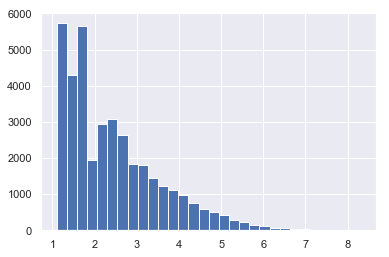

In [232]:
# Plot review counts from the yelp dataframe.
yelp_df['review_count'].apply(np.log).hist(bins=30)

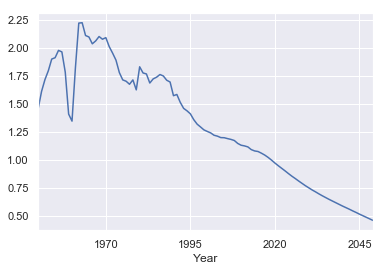

In [233]:
# Annual population growth from 1950 onward
pop_growth['Annual Growth Rate (%)'].plot()

The [plotting functions take many parameters](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for customizing the appearance of the output. Since they are essentially a wrapper around the Matplotlib functions, they also accept many of the Matplotlib parameters, not all of which are listed in the Pandas documentation. Pandas provides [a guide](https://pandas.pydata.org/pandas-docs/stable/visualization.html) to making various plots from DataFrames.